# SyriaTel Customer Churn Analysis

by: Armun Shakeri

# Overview

This project analyzes SyriaTel Customer Churn dataset to explore if there are any predictable patterns with 
cutomer turnover. 

# Business Problem

SyriaTel is interested in reducing the amount of money lost due to customer turnover. This project seeks to
analyze customer data and identify any patterns that lead to customer churn. 

# Data Understanding

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
%matplotlib inline

In [2]:
# Import data and display all columns
df = pd.read_csv("archive/bigml_59c28831336c6604c800002a.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
# Dropped area code and state 
# Display first 5 rows
df = df.drop(["state", "area code", "phone number"], axis=1)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


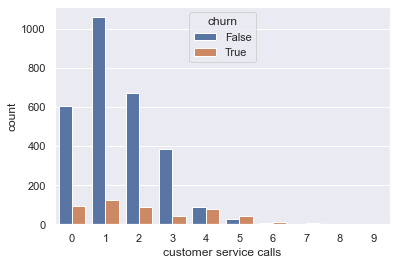

In [4]:
# Use countplot to plot customer service calls against customer churn 
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="customer service calls", hue="churn", data=df)

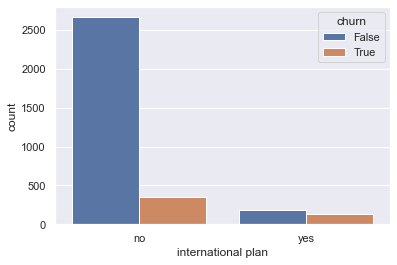

In [5]:
# Use countplot to plot international/domestic plans against customer churn 
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="international plan", hue="churn", data=df)

# international clients have a higher chance of churn

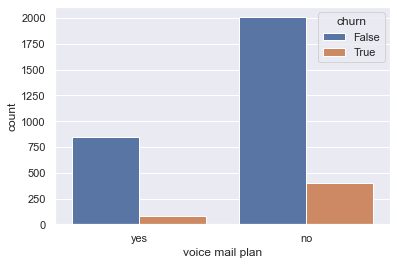

In [6]:
# Plot states against customer churn
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="voice mail plan", hue="churn", data=df)

In [7]:
# For categories with yes/no variables, make "yes" = 1 and "no" = 0
df['international plan'] = df['international plan'].apply(lambda x : 1 if "yes" else 0)
df['voice mail plan'] = df['voice mail plan'].apply(lambda x : 1 if "yes" else 0)

In [8]:
# change churn type to int
df['churn'] = df['churn'].astype(int)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,1,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [9]:
# Separate data into feature and target DataFrames
X = df.drop('churn', axis = 1)
y = df['churn']

# Split data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=1)
# Scale the data for modeling
call_scaler = StandardScaler()
X_train_sc = call_scaler.fit_transform(X_train)
X_test_sc = call_scaler.transform(X_test)

# x and y train used for unseen data in a short while, used in production to see which customers will or won't churn
# divide data into training and test set 
# want to test the data to see how it performs with unseen data
# need certain labels that we know the answer to (where test set comes in)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 17), (834, 17), (2499,), (834,))

# Data Modeling

In [11]:
# of first logistic regression model 
# print out accuracy, classification report for training set

# build model > model.predict() > print out classification report for training and test set > determine the fit
# repeat for two more modeling techniques, random forests and gradient boosting
# pick out best model and then do a grid search on that model

In [12]:
# Train a logistic regression model with the train data
churn_model = LogisticRegression(random_state=42)
churn_model.fit(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [13]:
y_test.value_counts()

0    712
1    122
Name: churn, dtype: int64

In [14]:
# Generate predictions
y_hat_train = churn_model.predict(X_train)
y_hat_test = churn_model.predict(X_test)

y_hat_train
y_hat_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

-----------------------------------------
Synthetic sample class distribution: 

1    2138
0    2138
Name: churn, dtype: int64


In [16]:
# Calculate the precision, recall, accuracy, and f1 score
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.423728813559322
Testing Precision:  0.46153846153846156



Training Recall:  0.06925207756232687
Testing Recall:  0.04918032786885246



Training Accuracy:  0.8519407763105242
Testing Accuracy:  0.8525179856115108



Training F1-Score:  0.11904761904761905
Testing F1-Score:  0.0888888888888889


# Evaluation

# Conclusion